## NLTK 자연어 처리 패키지¶

#### - NLTK(Natural Language Toolkit) 패키지는 교육용으로 개발된 자연어 처리 및 문서 분석용 파이썬 패키지
    - 필요한 패키지 설치 : 
        • pip show nltk 
        • pip install nltk
        • pip show wordcloud
        • pip install wordcloud
#### - 다양한 기능 및 예제를 가지고 있으며 실무 및 연구에서도 많이 사용
#### - NLTK 패키지가 제공하는 주요 기능
    • 말뭉치
    • 토큰 생성
    • 형태소 분석
    • 품사 태깅

#### from nltk.book import * 

#### *** Introductory Examples for the NLTK Book ***
 
Loading text1, ..., text9 and sent1, ..., sent9

Type the name of the text or sentence to view it.

Type: 'texts()' or 'sents()' to list the materials.

text1: Moby Dick by Herman Melville 1851

text2: Sense and Sensibility by Jane Austen 1811

text3: The Book of Genesis

text4: Inaugural Address Corpus

text5: Chat Corpus

text6: Monty Python and the Holy Grail

text7: Wall Street Journal

text8: Personals Corpus

text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [1]:
import warnings
warnings.filterwarnings('ignore')

import nltk

nltk.download('book', quiet=True)

from  nltk.book  import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
# 불용어 데이터 다운로드

nltk.download('stopwords', quiet=True) 

True

In [3]:
#  http://www.gutenberg.org/     
# Project Gutenberg is a library of over 60,000 free eBooks.
# 저작권이 말소된 문학작품을 포함하는 gutenberg 말뭉치에는 다음과 같은 작품들이 샘플로 포함되어 있음 

nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [4]:
# 이 중 제인 오스틴의 엠마 문서를 살펴보면 다음과 같이 원문 형태 그대로를 포함하고 있음 

emma_raw = nltk.corpus.gutenberg.raw('austen-emma.txt')

print (len(emma_raw))

887071


In [5]:
# 원문 내용 확인 

print(emma_raw[:100])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a


In [6]:
# 첫번째 단락(문단) : Emma Woodhouse ~ vex her. 
# 두번째 단락: She was ~ in affection.
# 세번째 단락: Sixteen years ~ of Emma. 

print(emma_raw[:1302])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

### 토큰 생성 메소드 

#### 1) Sentence 를 토큰화 : sent_tokenize 
#### 2) Word 를 토큰화 : word_tokenize

In [7]:
# 토큰 생성 메소드는 문자열을 입력받아 토큰 문자열의 리스트를 출력
# sent_tokenize: 문장 단위로 토큰화 

from nltk.tokenize import sent_tokenize


print('전체 문장 수 = ', len(sent_tokenize(emma_raw[:]))) 
print('\n') 

print('세번째 문장은 \n', sent_tokenize(emma_raw[:])[2])

전체 문장 수 =  7493


세번째 문장은 
 Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.


In [8]:
# word_tokenize: 단어 단위로 토큰화 

from nltk.tokenize import word_tokenize

word_tokenize(emma_raw[50:100])

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a']

In [9]:
# nltk에서 제공하는 정규식 메소드 적용하기 

from nltk.tokenize import RegexpTokenizer

word_bot = RegexpTokenizer(r'[\w]+')     # 단어만 추출하는 정규식 

word_bot.tokenize(emma_raw[50:100])      # 위 정규식에서 지정한 방식대로 토큰화 

['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']

In [10]:
# 파이썬에서 제공하는 정규식 메소드 이용하기 

import re

word_tok = re.compile(r'[\w]+')    # 단어만 추출 

print(word_tok.findall(emma_raw[50:100]))   # 위 정규식에서 지정한 방식대로 토큰화 

['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']


### 형태소 분석(morphological analysis)

#### 단어로부터 어근, 접두사, 접미사, 품사 등 다양한 언어적 속성을 파악하고 이를 이용하여 형태소를 찾아내거나 처리하는 작업

### 형태소 분석 작업 
#### •	어간 추출(stemming)
#### •	표제어 추출(lemmatizing)
#### •	품사 부착(Part-Of-Speech tagging)


In [11]:
# 어간 추출(stemming)은 변화된 단어의 접미사나 어미를 제거하고 같은 의미를 가지는 형태소의 기본형을 찾음 
# 어간 추출법은 단순히 어미를 제거할 뿐이므로 단어의 원형의 정확히 찾아주지는 않음

# NLTK는 PorterStemmer , LancasterStemmer class 를 제공하고 있음
# PorterStemmer: Martin Porter의 Porter stemming algorithm, Porter 알고리즘은 영어의 접미사(suffix)를 제거
# LancasterStemmer: Lancaster 대학이 개발한 Lancaster stemming algorithm

from nltk.stem import PorterStemmer, LancasterStemmer

st1 = PorterStemmer()

st2 =  LancasterStemmer()

words_list1 = ['fly', 'flies', 'flying', 'flew', 'flown'] 

print('Porter Stemmer   :', [st1.stem(wd) for wd in words_list1])
print('\n')

print('Lancaster Stemmer:', [st2.stem(wd) for wd in words_list1])

Porter Stemmer   : ['fli', 'fli', 'fli', 'flew', 'flown']


Lancaster Stemmer: ['fly', 'fli', 'fly', 'flew', 'flown']


### •	표제어 추출(lemmatizing)

In [12]:
# 표제어 추출(lemmatizing)은 같은 의미를 가지는 여러 단어를 사전형으로 통일하는 작업
# 품사(part of speech)를 지정하는 경우 좀 더 정확한 원형을 찾을 수 있음

from nltk.stem import WordNetLemmatizer

wnlm = WordNetLemmatizer()

[wnlm.lemmatize(wd, pos="v") for wd in words_list1]    # 품사를 동사로 지정한 경우 

['fly', 'fly', 'fly', 'fly', 'fly']

### •	품사 부착(Part-Of-Speech tagging)

In [13]:
# 품사(POS, part-of-speech)는 낱말을 문법적인 기능이나 형태, 뜻에 따라 구분
# 품사의 구분은 언어마다 그리고 학자마다 다름
# 예를 들어 NLTK에서는 펜 트리뱅크 태그세트(Penn Treebank Tagset)라는 것을 이용함
# 다음은 펜 트리뱅크 태그세트에서 사용하는 품사의 예
# •	NNP: 단수 고유명사  •	VB: 동사  •	VBP: 동사 현재형  •	TO: to 전치사  •	NN: 명사(단수형 혹은 집합형)  •	DT: 관형사

nltk.help.upenn_tagset("VB")    # 동사(VB) 에 대해서 자세한 내용을 검색

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


In [14]:
# pos_tag 메소드를 사용하면 단어 토큰에 품사를 부착하여 튜플로 출력
# 다음 예문에서 refuse, permit 단어가 각각 동사와 명사로 다르게 품사 부착이 됨

from nltk.tag import pos_tag

sentence = "Emma refused to permit us to obtain the refuse permit"

tagged_list = pos_tag(word_tokenize(sentence))

tagged_list

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [15]:
# 품사 태그 정보를 사용하면 명사(NN)인 토큰만 선택할 수 있음 

nouns_list = [tag[0] for tag in tagged_list if tag[1] == "NN"]

nouns_list

['refuse', 'permit']

In [16]:
# 실습 
# untag 메소드를 사용하면 태그 튜플을 제거할 수 있음 

from nltk.tag import untag

untag(tagged_list)

['Emma',
 'refused',
 'to',
 'permit',
 'us',
 'to',
 'obtain',
 'the',
 'refuse',
 'permit']

In [17]:
# 원래의 토큰과 품사를 붙여서 새로운 토큰 이름을 만들어 사용하면 철자가 같고 품사가 다른 단어를 구분할 수 있음 
# 아래 예에서 'permit/VB' vs 'permit/NN' 

def tokenizer(doc):
    return ["/".join(word_pos) for word_pos in tagged_list]   # 토큰과 품사를 '/' 기호를 이용하여 연결 

tokenizer(sentence)

['Emma/NNP',
 'refused/VBD',
 'to/TO',
 'permit/VB',
 'us/PRP',
 'to/TO',
 'obtain/VB',
 'the/DT',
 'refuse/NN',
 'permit/NN']

In [18]:
# stopwords 를 import 

from nltk.corpus import stopwords

# (예) 단어 토큰을 만듬 
example_token = ['i', 'am', 'going', 'to', 'go', 'to', 'the', 'store', 'and', 'park', 'by', 'my', 'car'] 

stop_words = stopwords.words('english')    # 영어의 불용어를 로딩 (179개)

print(stop_words[:10])      # 불용어를 확인 
print('\n') 

word_list2 = [word for word in example_token if word not in stop_words]     # 불용어 삭제 

print(word_list2[:])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


['going', 'go', 'store', 'park', 'car']


In [19]:
# NLTK의 Text 클래스는 문서 분석에 유용한 여러가지 메소드를 제공
# 문자열을 입력받아 토큰열을 생성함 

from nltk import Text

word_bot = RegexpTokenizer(r'[\w]+')   # 단어를 추출하는 정규식 

text = Text(word_bot.tokenize(emma_raw))  # emma_raw 의 단어 만을 추출하여 text 라는 단어 토큰열을 생성

type(text)

nltk.text.Text

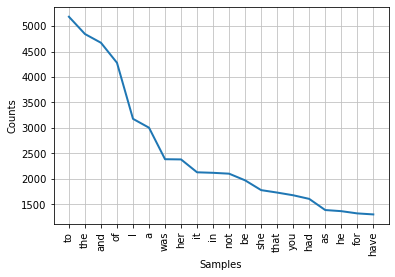

In [20]:
# plot 메소드를 사용하면 각 단어(토큰)의 사용 빈도를 그래프로 그려줌 


text.plot(20)      # 사용 빈도 상위 20개 단어의 선택

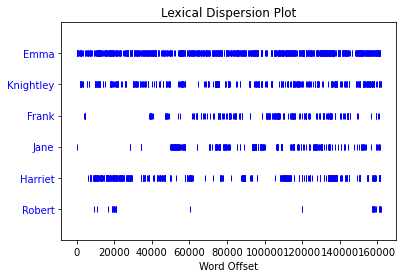

In [21]:
# dispersion_plot 메소드는 단어가 사용된 위치를 시각화 함 


text.dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"]) # 소설 엠마의 각 등장인물에 대해 적용

In [22]:
# concordance 메소드는 단어가 사용된  문맥(context)을 파악할 수 있음 
# 문맥이란 해당 단어의 앞과 뒤에 사용된 단어들을 의미

text.concordance("Emma")

Displaying 25 of 865 matches:
 Emma by Jane Austen 1816 VOLUME I CHAPTER
 Jane Austen 1816 VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this
or I have a great regard for you and Emma but when it comes to the question of
a fanciful troublesome creature said Emma playfully That is what you have in y
e few people who could see faults in Emma Woodhouse and th

In [23]:
# FreqDist 클래스는 문서에 사용된 단어(토큰)의 사용빈도 정보를 담는 클래스

from nltk import FreqDist

stopwords = ["Mr.", "Mrs.", "Miss", "Mr", "Mrs", "Dear", "VOLUME", "Between", "Sixteen"]

emma_tokens = pos_tag(word_bot.tokenize(emma_raw))    


# 사람 이름만 추출 
names_list = [tok[0] for tok in emma_tokens if tok[1]=="NNP" and tok[0] not in stopwords]  # NNP: 단수 고유명사

print(names_list[:10])
print('\n')

['Jane', 'Austen', 'Emma', 'Woodhouse', 'Taylor', 'Woodhouse', 'Emma', 'Taylor', 'Emma', 'Taylor']




In [24]:
# FreqDist 클래스는 단어를 키(key), 출현빈도를 값(value)으로 가지는 사전 자료형과 유사
# 다음 코드는 전체 단어의 수, “Emma”라는 단어의 출현 횟수, 확률을 각각 계산 (전체 단어수에서 "Emma"가 차지하는 비율)

fd_names = FreqDist(names_list) 

fd_names.N(), fd_names["Emma"], fd_names.freq("Emma")

(7856, 830, 0.10565173116089613)

In [25]:
# most_common 메소드를 사용하면 가장 출현 횟수가 높은 단어를 찾음 

fd_names.most_common(10)      # 가장 출현 횟수가 많은 상위 10개 단어를 추출

[('Emma', 830),
 ('Harriet', 491),
 ('Weston', 439),
 ('Knightley', 389),
 ('Elton', 385),
 ('Woodhouse', 304),
 ('Jane', 299),
 ('Fairfax', 241),
 ('Churchill', 223),
 ('Frank', 208)]

### ▶ wordcloud 패키지를 사용하면 단어의 사용 빈도수에 따라 워드클라우드를 생성할 수 있다.

In [28]:
# 필요한 패키지를 import 
# https://pypi.org/project/wordcloud/   


from wordcloud import WordCloud

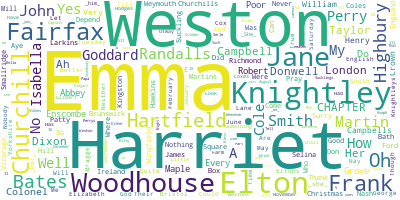

In [29]:
wordcloud = WordCloud(background_color="white", random_state=0)  # random_state 를 지정하지 않으면, 매번 워드클라우드 그림이 달라짐


cloud= wordcloud.generate_from_frequencies(fd_names)

wordcloud.to_image()

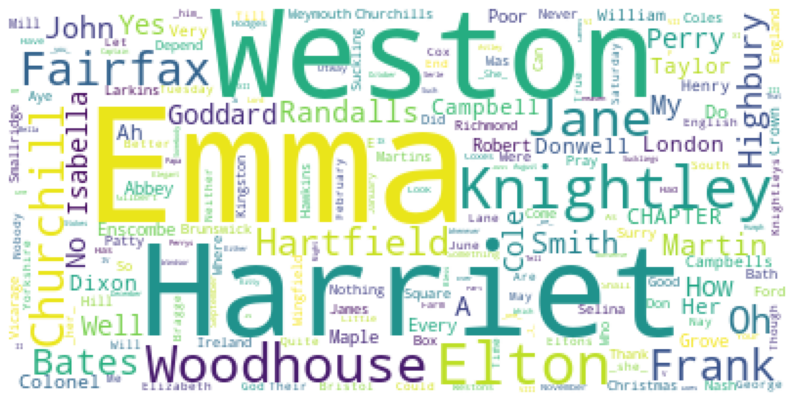

In [30]:
# matplotlib 을 이용하여 위의 워드 클라우드를 그리기 
import matplotlib.pyplot as plt

plt.figure(figsize=(14,12))    #  가상의 도화지를 정의하고 크기를 지정해 줌
plt.imshow(cloud)              # 가상의 도화지에 cloud 그림을 그림

# plt.axis("on")

plt.axis("off")                # x, y축 선을 그리지 않게 세팅 
plt.show()                     # 가상의 그림을 화면에 출력  